In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
from pathlib import Path

# in jupyter (lab / notebook), based on notebook path
module_path = str(Path.cwd().parents[0] / "src")
# in standard python

if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
import data_processing as dp
import case_study_raw_query

In [4]:
# pip install sklearn
connector = dp.establish_connection()

Initiating login request with your identity provider. A browser window should have opened for you to complete the login. If you can't see it, check existing browser windows, or your OS settings. Press CTRL+C to abort and try again...
Going to open: https://newrelic.okta.com/app/snowflake/exkugjs4xeGHw0Vo10x7/sso/saml?SAMLRequest=lZJRb9owFIX%2FSuQ9J3YChc4CKlrUEq3rKIQ87M1NLtQksTNfp0n%2F%2FUwoUzeplfZm2edcf%2FeeO7nqqtJ7AYNSqykJA0Y8UJnOpdpPyTa59S%2BJh1aoXJRawZS8ApKr2QRFVdZ83thntYZfDaD1XCGFvH%2BYksYorgVK5EpUgNxmfDP%2Ffs%2BjgPHaaKszXZJ3ls8dAhGMdYRnS47S4T1bW3NK27YN2kGgzZ5GjDHKvlKnOkq%2BnPWd6%2BkDfUjZ8Kh3CidfvbFdS3UawWdYTycR8mWSrPzVj01CvPkZ9UYrbCowGzAvMoPt%2Bv4EgI5AQWuglJlD8HNhhcYAlW53pSgg01XdWFc2cCe6g5yWei9d5%2FFiSupC5p1ajq7jxzS53IL5lo5X82ZdyccufXhSw2R4UVR3hzhL9cEUGfHSc7TRMdoYsYFYHQO17opFFz4b%2BWyQsCFnYx4NgsEo%2Bkm8hQtUKmF757%2FUgS6s6OlEXdM%2F4BS6otkfcNjB3bJlqQ5ZN6aImh4DJqed4T2Bmf33JCb0vf1t%2Fx5cJPFipV2BV%2B9Wm0rYjxMLg7C%2Fkbm%2F66UcKiHLeZ4bQHTJlaVubwwI69bcmgYInZ1%2B%2FXvRZ78B&RelayState=ver%3

In [5]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [25]:
# Pull data from Snowflake using raw_query
query = case_study_raw_query.query()
df = dp.fetch_data(query, connector)

In [26]:
df.head()

,SUBSCRIPTION_ACCOUNT_ID,EFFECTIVE_SUBSCRIPTION_ACCOUNT_ID,SFDC_ACCOUNT_ID,SFDC_ACCOUNT_NAME,REPORT_AS_OF_DT,REPORT_MONTH,BUYING_PROGRAM,LATEST_BUYING_PROGRAM,EFFECTIVE_ACR,IS_CONTRACT_FLAG,LATEST_EFFECTIVE_ACR,BCM,LATEST_BCM,INGEST_BCM,INGEST_UNIT_PRICE,CCU_BCM,CCU_UNIT_PRICE,USERS_BCM,USERS_UNIT_PRICE,SUBSCRIPTION_TERM_START_DATE,SUBSCRIPTION_TERM_END_DATE,RENEWAL_DATE,MULTIYEAR_FLAG,TOTAL_ACR,INDUSTRY,PHYSICAL_COUNTRY,SALES_HIER_GEO,SALES_HIER_REGION,SALES_HIER_SUB_REGION,EMPLOYEES,CHURN_INDICATOR,CONTRACT_START_DATE,MONTHS_SINCE_CONTRACT_START,DAILY_ENGAGED_USERS,DAU_R7D,COMMITTED_USERS,ROLLING_60_DAY_MEDIAN,DENOM_USERS,ADV_USED_FEATURES,TOTAL_ADV_FEATURES,DAU_ACTUALS,USED_FEATURES,TOTAL_FEATURES_3_PERCENT,DAU_R30D,TOTAL_FEATURES_R7D,USED_FEATURES_R7D,L3M_BCM,DAY_WISE_ACR,MONTH_WISE_ACR,AMOUNT_LEFT,CTD_CONSUMPTION_AMT_UPDATED,DAY_TEMPERATURE,MONTH_TEMPERATURE,DAYS_TO_DEPLETE,MONTHS_TO_DEPLETE,DAYS_UNTIL_RENEWAL,MONTHS_UNTIL_RENEWAL,FIRST_REPORT_DATE,RENEWAL_URGENCY_DAYS,OVERAGES,REVENUE_GROWTH_SCORE,CONTRACT_LENGTH_MTHS,CTD_CONSUMPTION_AMT,QTD_CONSUMPTION_AMT,YTD_CONSUMPTION_AMT,MTD_CONSUMPTION_EFF_AMT,MIN_COMMIT_AMT,M_PLUS_1_BCM,M_PLUS_3_BCM,M_PLUS_4_BCM,M_PLUS_5_BCM,M_PLUS_6_BCM,M_PLUS_10_BCM,M_PLUS_11_BCM,M_PLUS_12_BCM,TARGET_M_PLUS_6_BCM,TARGET_M_PLUS_12_BCM,PCT_M_PLUS_1_BCM,PCT_M_PLUS_3_BCM,PCT_M_PLUS_6_BCM,PCT_M_PLUS_12_BCM,CONSUMED_MONTH_NUMBER,CONSUMED_MONTH_NUMBER_PER_SUBSCRIPTION,MTH_DIFF,MTHS_TILL_DATE,NUMBER_OF_OPEN_INVOICES_DUE_BEFORE_MONTH_END,SEGMENT_NAME,METRIC_NAME,METRIC_VALUE,SCORE_TYPE,METRIC_SCORE,METRIC_NAME_SCORE,WEIGHTS,ADOPTION_SCORE_CAL,ENGAGEMENT_SCORE_CAL,FINANCIAL_HEALTH_SCORE_CAL,RISK_SCORE_CAL
0,3109311,3109311,0011U00001S92AhQAJ,Booking.com B.V.,2025-01-31,2025-01-01,Savings Plan,Savings Plan,550050.000000000,1,550050.000000000,41263.926787720,42248.604578280,20879.926787720,0.300000000,0E-9,0E-9,20384.000000000,416.000000000,2023-12-01,2025-12-01,2025-12-01,1,1100100.000000000,Other,Netherlands,AMER,Enterprise,East,2.000000000,N,2024-12-01,1,49.000000000,49.000000000000,40.000000000,47.000000000000,47.000000000000,5.0,11.0,7,11,39.0,6.233,39.000,8.142,38139.666,1504.924760601915,45837.500000000000,557286.882617686,542813.117382314,25.34,0.83,433.517606081436,14.611726956890,304,11,2023-11-22,None,None,67.38,24.00,517219.999406134,41263.926787720,383021.955535873,41263.926787720,16640.000000000,40760.537772357,42487.601961265,42248.604578280,None,None,None,None,None,None,None,-1.220100396576,2.965301379568,-100.000000000000,-100.000000000000,26,14,13,4,0.00,Late Savings Plan,USER_ACTIVATION_PERCENTAGE,104.26,Adoption_score,63.0,USER_ACTIVATION_PERCENTAGE_HSCORE,0,52,0,79,1
1,2295672,2295672,0011U00001S8m91QAB,Massachusetts Mutual Life Insurance Company,2023-09-30,2023-09-01,Volume Plan,Savings Plan,643200.000000000,1,969800.000000000,67282.370210935,83595.396278589,41582.370210935,0.300000000,0E-9,0E-9,25700.000000000,309.000000000,2022-12-16,2023-12-16,2023-12-16,0,643200.000000000,Finance,United States,AMER,Strategic,Strategic,5001.000000000,N,2022-12-16,9,125.000000000,124.714285714285,180.000000000,119.000000000000,180.000000000000,NaN,NaN,0,0,4.0,8.600,4.000,2.857,63852.000,1762.191780821918,53600.000000000000,-895.963260858,644095.963260858,36.23,1.19,-0.416320459485,-0.014031874661,77,3,2022-12-16,None,20.11,61.74,12.00,617882.536470089,197053.653078112,378631.907178063,64376.370210935,53600.000000000,68933.212659468,65792.622452686,67534.236472365,66682.039517641,71845.161249701,76008.272089131,78649.369056786,80578.543103132,68687.145746569000,78412.061416349667,2.454167027538,-2.213634474769,2.088442297448,16.542405719731,10,10,9,20,0.00,Late Savings Plan,OPEN_TICKETS,1.00,Engagement_score,0.0,OPEN_TICKETS_HSCORE,0,59,0,59,89
2,2295672,2295672,0011U00001S8m91QAB,Massachusetts Mutual Life Insurance Company,2023-09-30,2023-09-01,Volume Plan,Savings Plan,643200.000000000,1,969800.000000000,67282.370210935,83595.396278589,41582.370210935,0.300000000,0E-9,0E-9,25700.000000000,309.000000

In [27]:
df.shape

(1634, 97)

In [28]:

unique_combinations = df[['SFDC_ACCOUNT_NAME', 'SEGMENT_NAME']].drop_duplicates()
unique_combinations

,SFDC_ACCOUNT_NAME,SEGMENT_NAME
0,Booking.com B.V.,Late Savings Plan
1,Massachusetts Mutual Life Insurance Company,Late Savings Plan
5,"Salesforce.com, Inc. - Master",Late Volume Plan
15,Halliburton Company,Late Savings Plan
104,Philips North America Corporation,Late Volume Plan


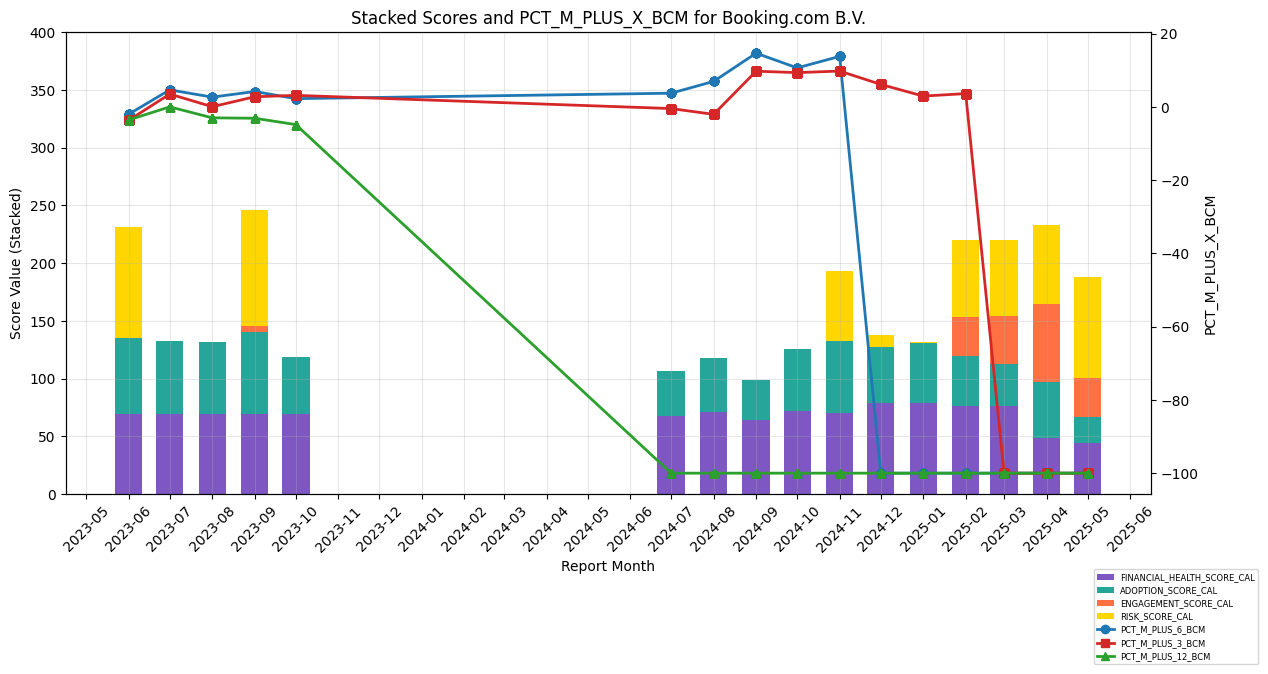

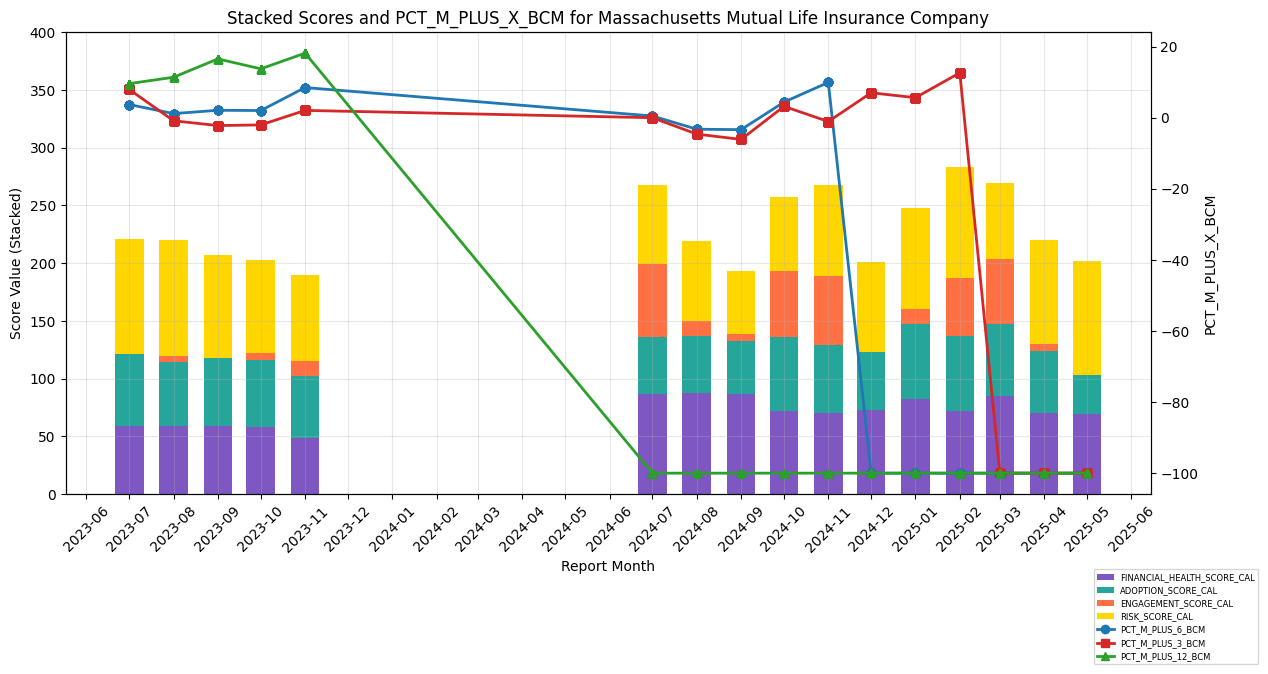

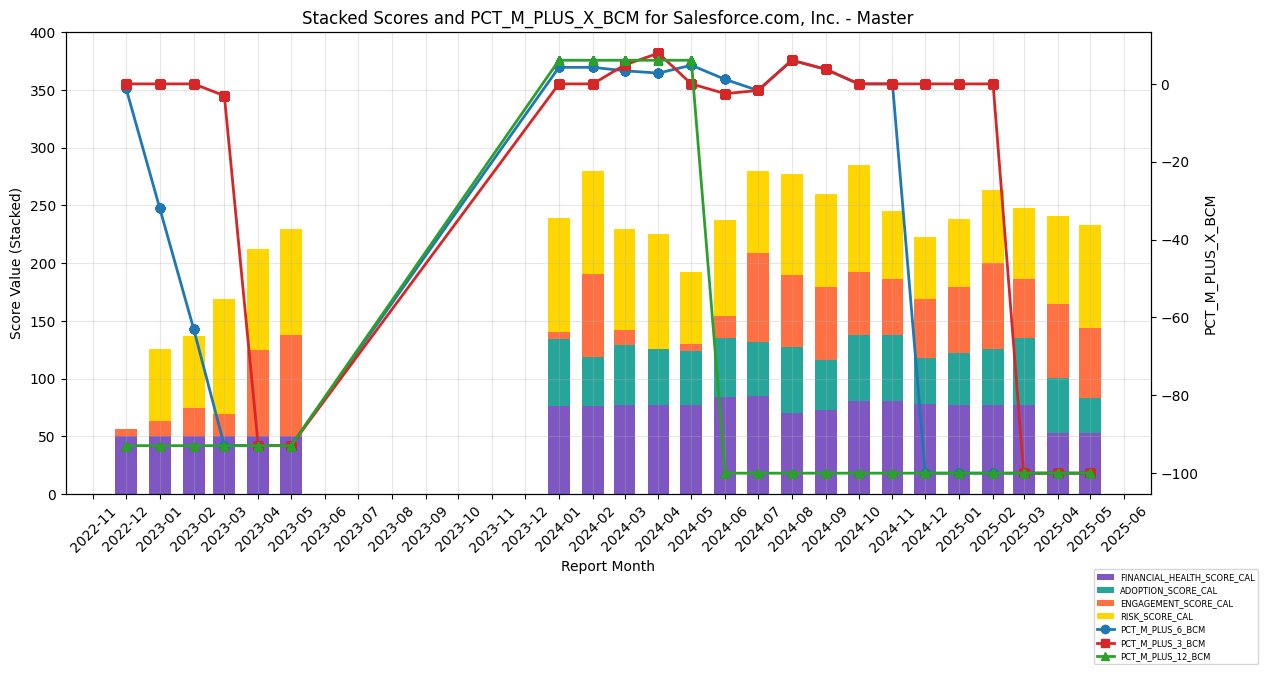

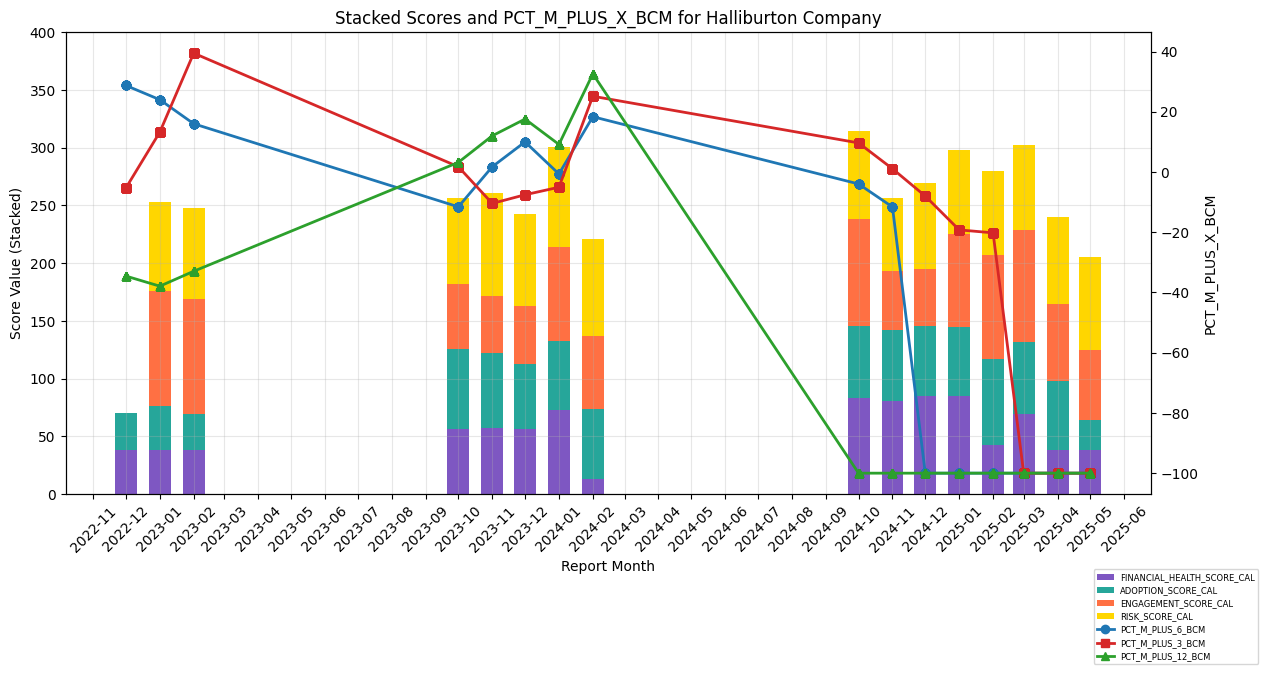

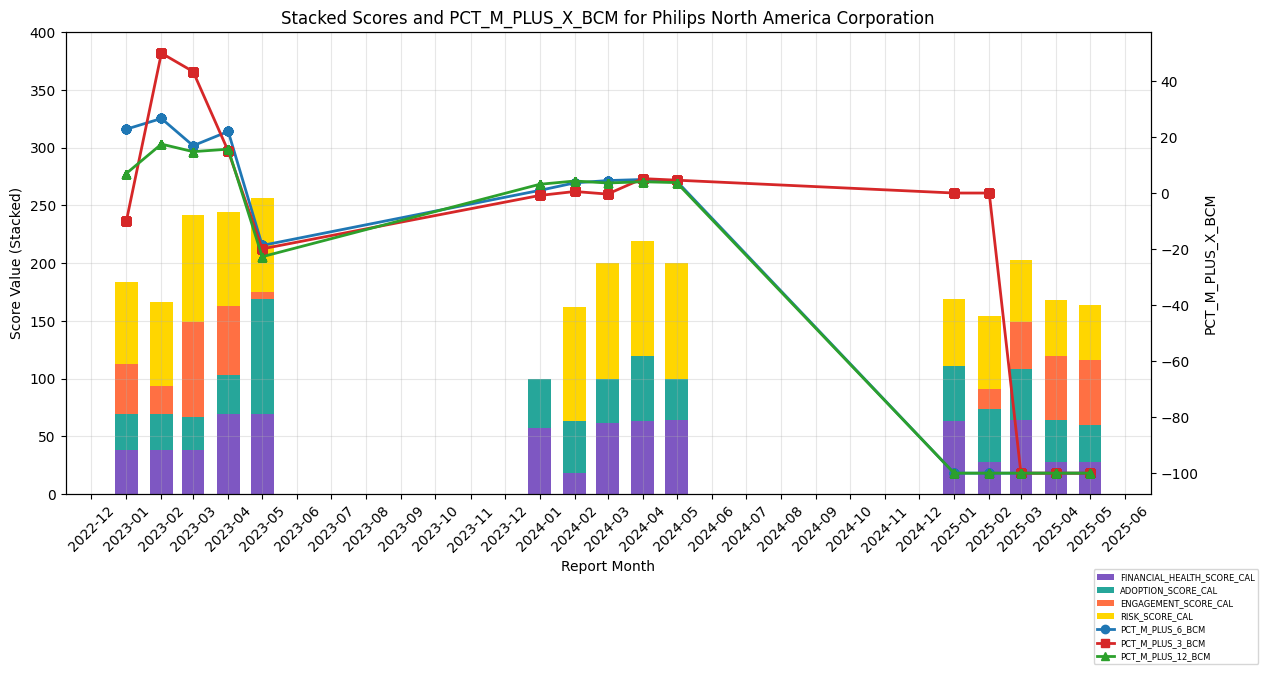

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

score_cols = [
    "FINANCIAL_HEALTH_SCORE_CAL",
    "ADOPTION_SCORE_CAL",
    "ENGAGEMENT_SCORE_CAL",
    "RISK_SCORE_CAL"
]

bar_colors = ['#7E57C2', '#26A69A', '#FF7043', '#FFD600']  # purple, teal, orange, yellow
line_colors = ['#1f77b4', '#d62728', '#2ca02c']  # blue, red, green (distinct from bars)

for account in df['SFDC_ACCOUNT_NAME'].unique():
    acc_df = df[df['SFDC_ACCOUNT_NAME'] == account].copy()
    acc_df['REPORT_MONTH'] = pd.to_datetime(acc_df['REPORT_MONTH'])
    acc_df = acc_df.sort_values('REPORT_MONTH')
    # Cap score columns to 400
    plot_df = acc_df.copy()
    for col in score_cols:
        plot_df[col] = np.clip(plot_df[col], 0, 400)
    x = plot_df['REPORT_MONTH']
    y = plot_df[score_cols].values.T

    fig, ax1 = plt.subplots(figsize=(14, 6))
    # Stacked bar on left y-axis
    bottom = np.zeros(len(x))
    for idx, col in enumerate(score_cols):
        ax1.bar(x, plot_df[col], bottom=bottom, label=col, width=20, color=bar_colors[idx])
        bottom += plot_df[col]
    ax1.set_ylabel("Score Value (Stacked)", color='black')
    ax1.set_ylim(0, 400)
    ax1.set_xlabel("Report Month")
    ax1.set_title(f"Stacked Scores and PCT_M_PLUS_X_BCM for {account}")
    ax1.grid(True, alpha=0.3)
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax1.xaxis.set_major_locator(mdates.MonthLocator())
    plt.xticks(rotation=45)

    # Line plots on right y-axis
    ax2 = ax1.twinx()
    pct6 = pd.to_numeric(plot_df['PCT_M_PLUS_6_BCM'], errors='coerce')
    pct3 = pd.to_numeric(plot_df['PCT_M_PLUS_3_BCM'], errors='coerce')
    pct12 = pd.to_numeric(plot_df['PCT_M_PLUS_12_BCM'], errors='coerce')
    ax2.plot(x, pct6, color=line_colors[0], marker='o', linewidth=2, label='PCT_M_PLUS_6_BCM')
    ax2.plot(x, pct3, color=line_colors[1], marker='s', linewidth=2, label='PCT_M_PLUS_3_BCM')
    ax2.plot(x, pct12, color=line_colors[2], marker='^', linewidth=2, label='PCT_M_PLUS_12_BCM')
    ax2.set_ylabel("PCT_M_PLUS_X_BCM", color='black')
# Optionally, set y-limits for the right axis if you want to focus on a range
    # ax2.set_ylim(min(pct6.min(), pct3.min(), pct12.min()), max(pct6.max(), pct3.max(), pct12.max()))

    # Combine legends from both axes
    handles1, labels1 = ax1.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
        fig.legend(
        handles1 + handles2,
        labels1 + labels2,
        fontsize=6,
        loc='lower right',
        bbox_to_anchor=(0.98, -0.18)
    )
    plt.show()

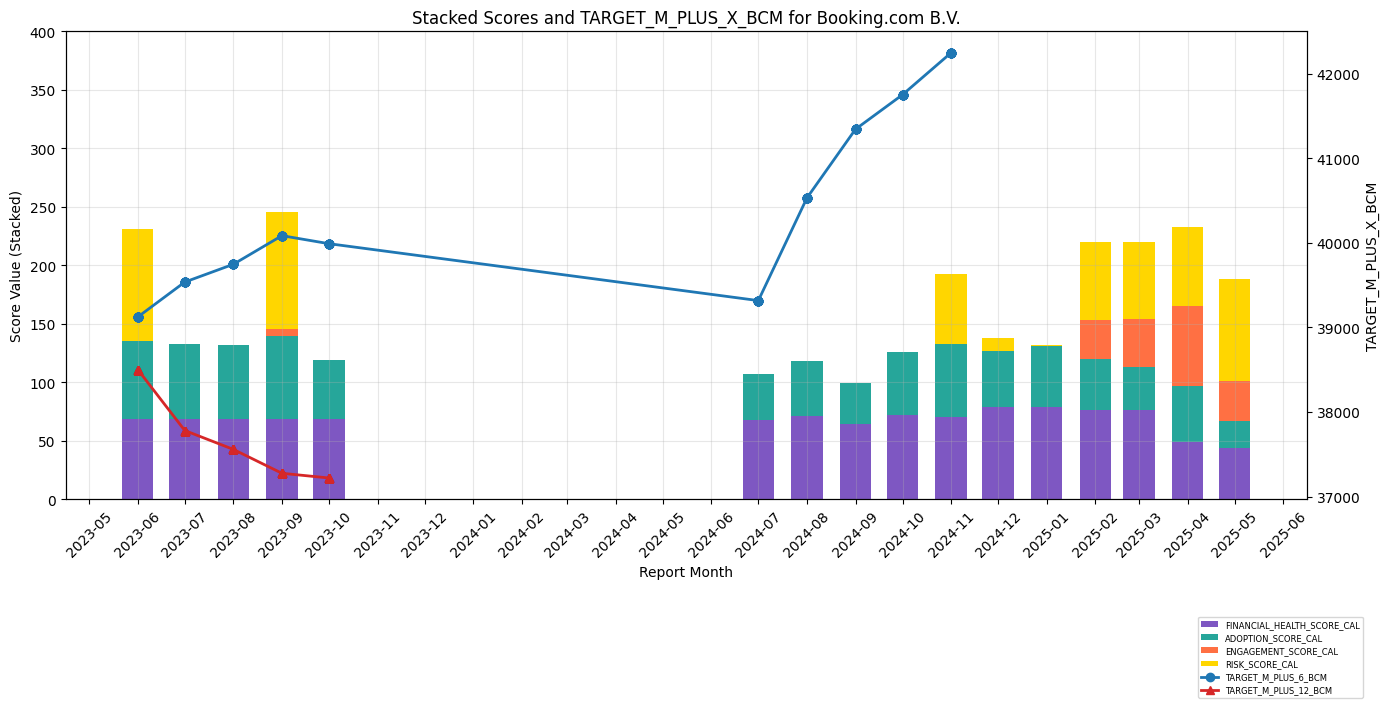

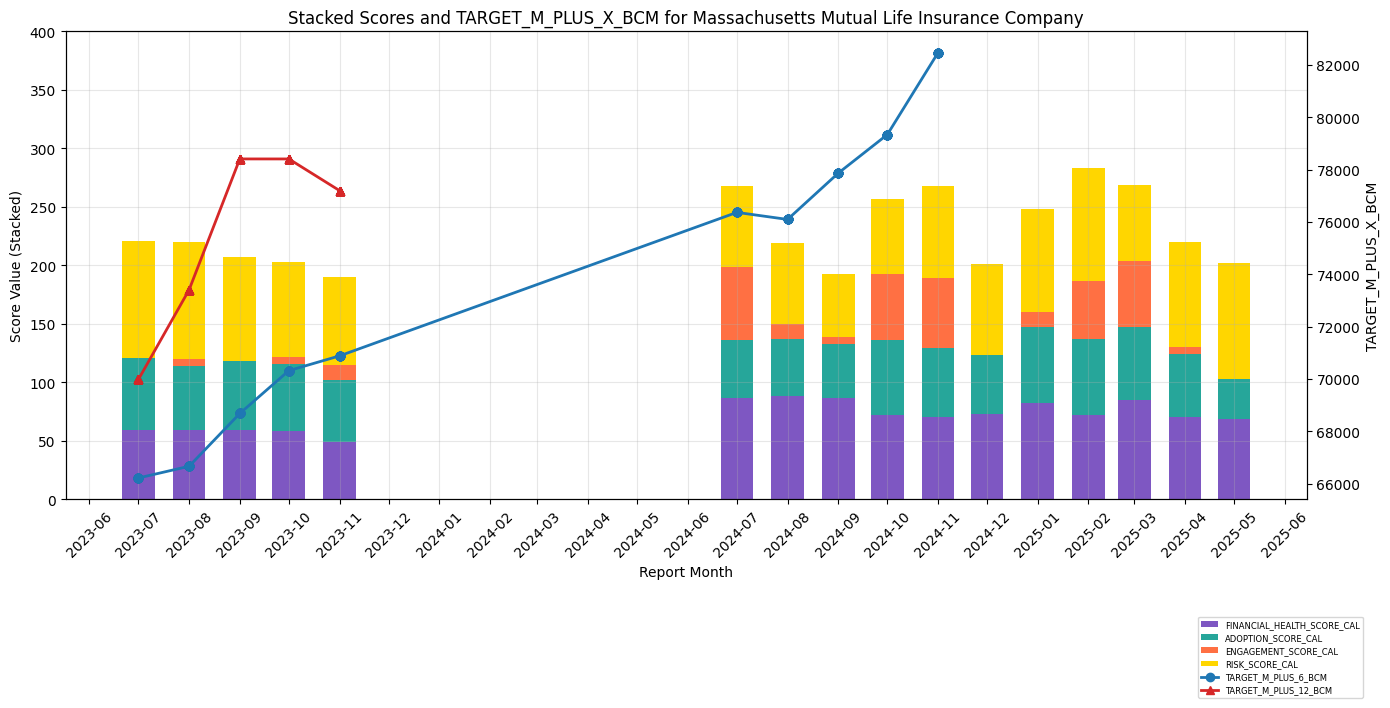

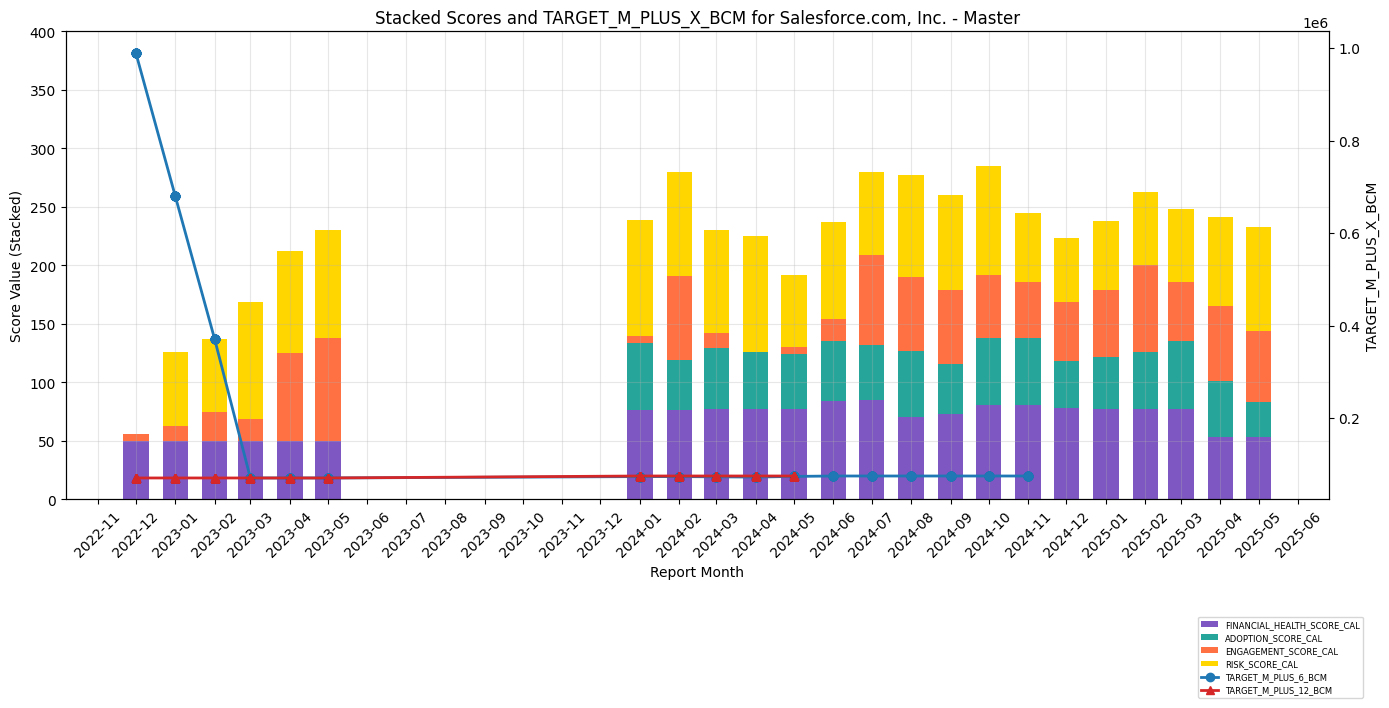

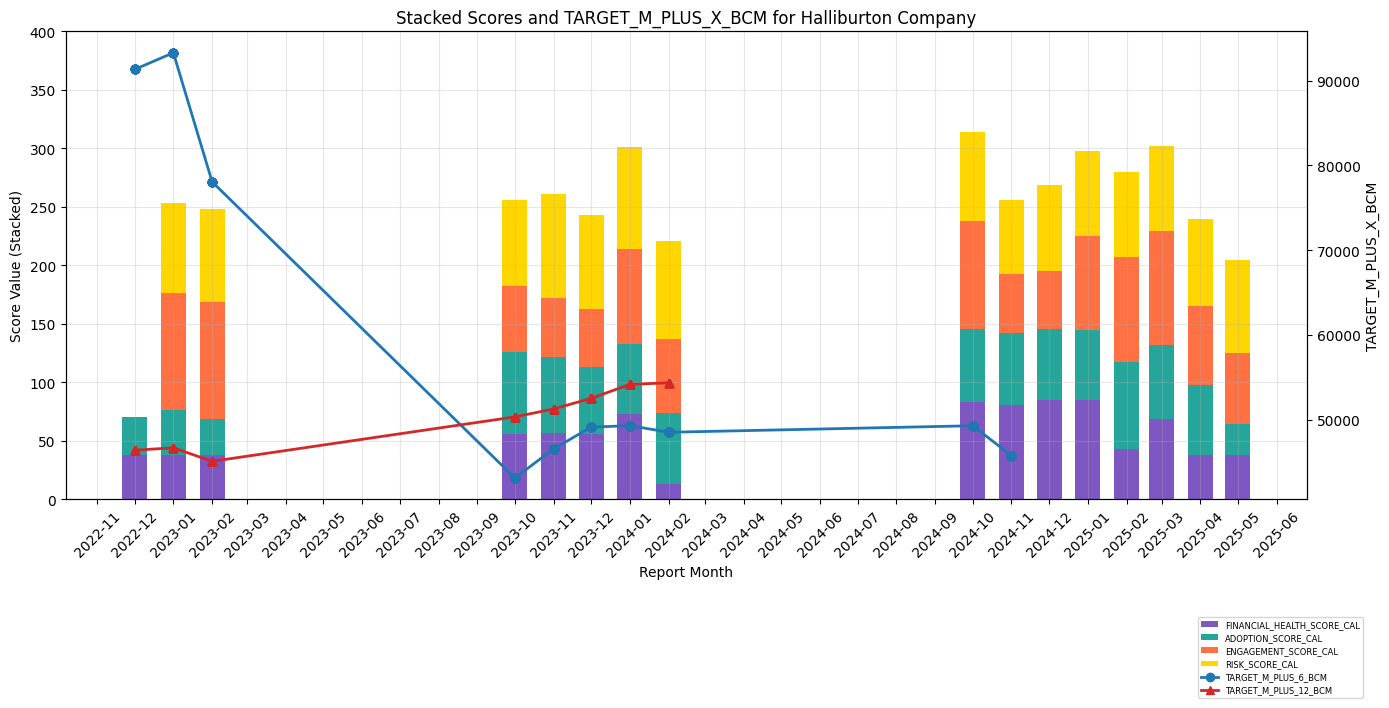

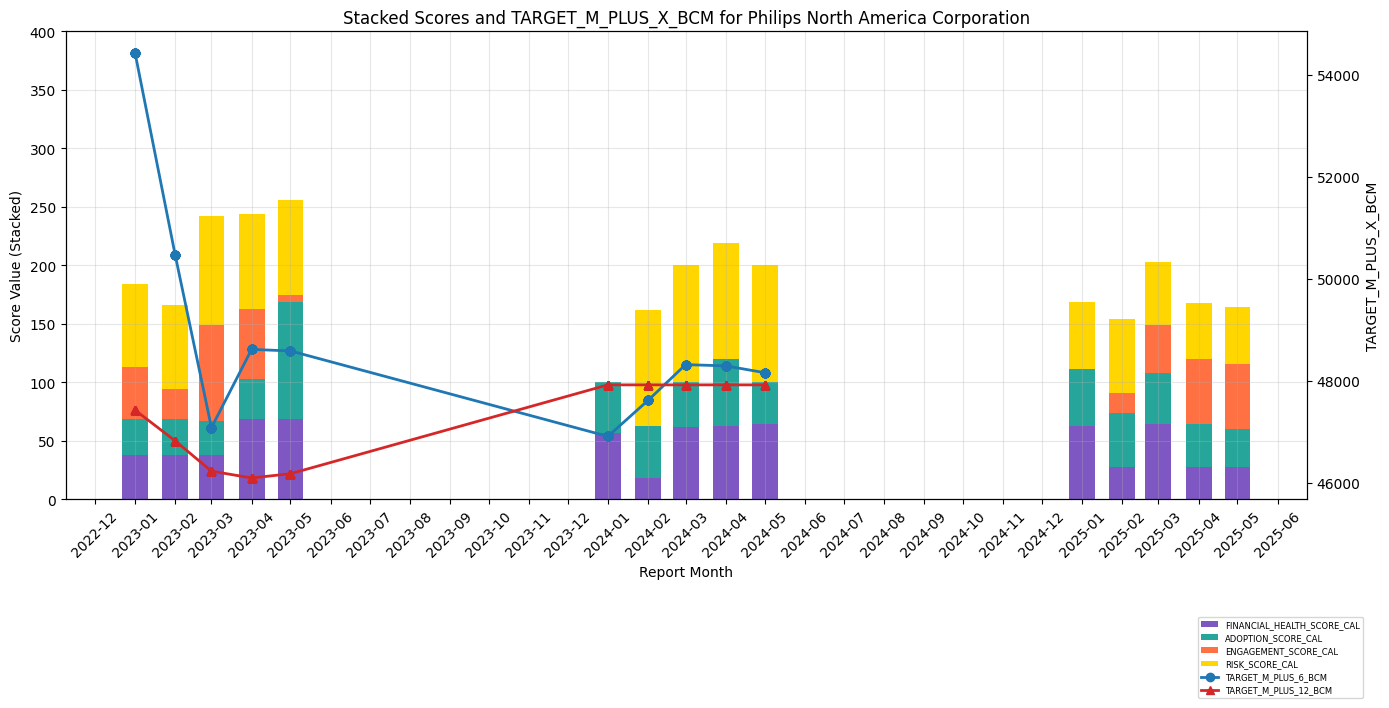

In [33]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

score_cols = [
    "FINANCIAL_HEALTH_SCORE_CAL",
    "ADOPTION_SCORE_CAL",
    "ENGAGEMENT_SCORE_CAL",
    "RISK_SCORE_CAL"
]

bar_colors = ['#7E57C2', '#26A69A', '#FF7043', '#FFD600']  # purple, teal, orange, yellow
line_colors = ['#1f77b4', '#d62728']  # blue, red (distinct from bars)

for account in df['SFDC_ACCOUNT_NAME'].unique():
    acc_df = df[df['SFDC_ACCOUNT_NAME'] == account].copy()
    acc_df['REPORT_MONTH'] = pd.to_datetime(acc_df['REPORT_MONTH'])
    acc_df = acc_df.sort_values('REPORT_MONTH')
    # Cap score columns to 400
    plot_df = acc_df.copy()
    for col in score_cols:
        plot_df[col] = np.clip(plot_df[col], 0, 400)
    x = plot_df['REPORT_MONTH']
    y = plot_df[score_cols].values.T

    fig, ax1 = plt.subplots(figsize=(14, 6))
    # Stacked bar on left y-axis
    bottom = np.zeros(len(x))
    for idx, col in enumerate(score_cols):
        ax1.bar(x, plot_df[col], bottom=bottom, label=col, width=20, color=bar_colors[idx])
        bottom += plot_df[col]
    ax1.set_ylabel("Score Value (Stacked)", color='black')
    ax1.set_ylim(0, 400)
    ax1.set_xlabel("Report Month")
    ax1.set_title(f"Stacked Scores and TARGET_M_PLUS_X_BCM for {account}")
    ax1.grid(True, alpha=0.3)
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax1.xaxis.set_major_locator(mdates.MonthLocator())
    plt.xticks(rotation=45)

    # Line plots on right y-axis for TARGET_M_PLUS_6_BCM and TARGET_M_PLUS_12_BCM
    ax2 = ax1.twinx()
    tgt6 = pd.to_numeric(plot_df['TARGET_M_PLUS_6_BCM'], errors='coerce')
    tgt12 = pd.to_numeric(plot_df['TARGET_M_PLUS_12_BCM'], errors='coerce')
    ax2.plot(x, tgt6, color=line_colors[0], marker='o', linewidth=2, label='TARGET_M_PLUS_6_BCM')
    ax2.plot(x, tgt12, color=line_colors[1], marker='^', linewidth=2, label='TARGET_M_PLUS_12_BCM')
    ax2.set_ylabel("TARGET_M_PLUS_X_BCM", color='black')

    handles1, labels1 = ax1.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
    plt.tight_layout()
    fig.legend(
        handles1 + handles2,
        labels1 + labels2,
        fontsize=6,
        loc='lower right',
        bbox_to_anchor=(0.98, -0.18)
    )
    plt.show()